# MTB Events

To run this program, your tracking data must be in a .csv file. The .csv file needs four columns: a column labeled "Trajectory", "x", "y". The "Trajectory" column will hold the unique integer value assigned to the trajectory. "x" and "y" are respectively the x and y position of said trajectory.

To import the library directy below, please ensure the python file "mtb_events_func.py" in the same folder as this file and run the code.

This program was developed to determine the type of events that MTB, or magnetotactic bacteria, specifically AMB-1, undergo while swimming by simply using the bacterium's recorded position. By classifying what an event is, either a tumble or a reverse, we can then correlate the probability of said event to the strength of a magnetic field applied.

In [1]:
from mtb_events_func import *

## Get Events

The most useful function is the "get_events" function. The parameters used in this function are as follows:

### - filedir
a string variable that designates the folder in which your .csv files are stored

### - fpra
a positive intenger variable, 'frames per rolling average', this variable will take a rolling average of your trajectories. In essence, this will 'smooth' out any imperfections that may be caused by noise.

### - frame_threshold_count
a positive integer variable where any trajectories with any less updates will be removed from the dataset. Set to 0 if you would like every trajectory to be included, regardless of trajectory length.

### - heading_std_threshold 
a positive float between 0 and 2. The heading, or the direction that the trajectory is facing, is a value between 0 and 1 for x and for y. As the trajectory follows, the fpra variable will dictate over how many frames of the trajectory's heading will be used as the standard deviation. The heading standard deviation is then used as a threshold variable to determine if an event has occured. A heading_std_threshold of 0 will consider almost all movements to be an event, and a heading_std_threshold of 2 will guarantee an event will never be considered. The current ideal operating value is 0.4.

### - speed_fraction 
a positive float between 0 and 1. Similar to the heading_std_threshold, but with speed. When a trajectory's speed goes below the product of this float and the median of the speed of the trajectory, then an event will be considered.

### - write
a boolean variable. If True, the program will write a .csv file in the folder with results in the filedir.

### - debugprints
a boolean variable. If True, the program will print results and data for each trajectory in each file.


### Output
The function, after completing each file, will print that the file has been completed followed by how many tumbles and how many reverses were found in the trajectories. This function also returns a dictionary with the formatting:
>tumble_length_history = {filename and trajectory: tumble length in frames}

The function is as written:

>**get_events(filedir, fpra, frame_threshold_count, heading_std_threshold = 0.4, speed_fraction = 0.66, write = False, debugprints = False)**

Thus, the only mandatory variable are the first three.

Below is an example.

In [2]:
tumble_length_history = get_events("ExampleDataSets", 5, 20)

1.csv completed.
48 tumbles and 63 reverses found.
3.csv completed.
33 tumbles and 32 reverses found.
2.csv completed.
43 tumbles and 28 reverses found.


## Plotting Functions

There are two main plotting functions, **plot_event_history** and **show_trajectory**.

### plot_event_history
This function uses the dictionary from get_events and plots a simple histogram of the lengths of events. The x-axis is in ticks (or frames, synonymously) and the y is the frequency of those events.


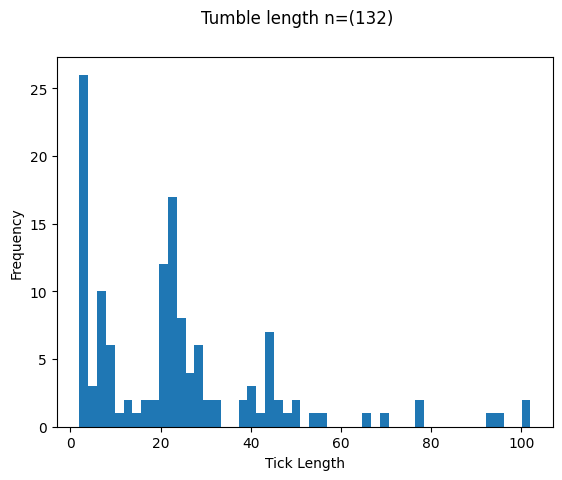

In [3]:
plot_event_history(tumble_length_history)

### show_trajectory
This function will plot the given trajectory from a given file with its data.
> **show_trajectory(filename, traj, fpra = 1, heading_std_threshold = 0.4, speed_fraction = 0.66):**

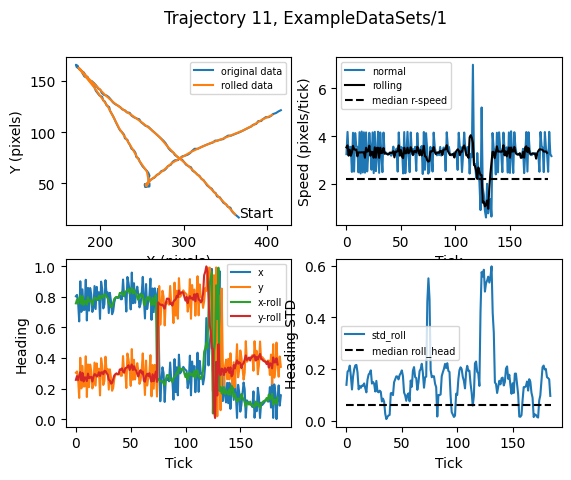

In [14]:
show_trajectory("ExampleDataSets/1.csv", 11, fpra=4)